In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")

In [2]:
df.shape

(1460, 81)

### There are 1460 rows and 81 columns

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### There are 43 object type cols, 35 integer type cols, 3 float type cols

In [5]:
df.isnull().sum().sum()

np.int64(7829)

In [6]:
df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
BldgType           0
Neighborhood       0
LandSlope          0
LotConfig          0
Condition1         0
dtype: int64

### There are 7829 missing values and 5-6 cols have missing values greater than haalf of its entries so we can drop it

In [7]:
df.duplicated().sum()

np.int64(0)

### There is no duplicate row

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### There are many cols to study the so we are going to analyze the top 15-20 cols which give more insights of the data
<br>
<br>

# Univariate Analysis

In [11]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='MSSubClass', ylabel='count'>

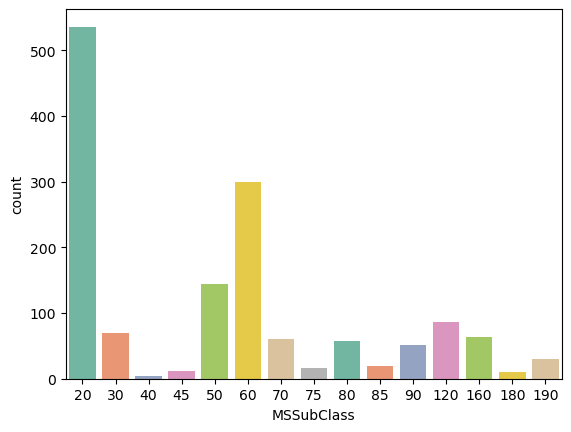

In [12]:
sns.countplot(data=df, x="MSSubClass" , palette="Set2") 

### Most of the houses are of single type (20 -> most frequent)
### Some houses are of medium size which are suitable for a family (50,60 MSSubClass)
### Very less houses are of large size

<Axes: xlabel='MSZoning', ylabel='count'>

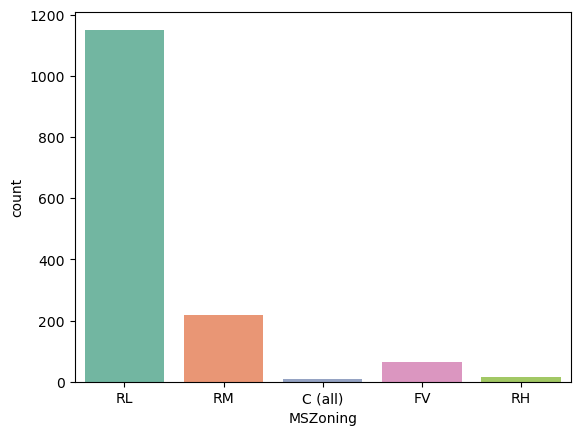

In [14]:
sns.countplot(data=df, x="MSZoning" , palette="Set2")

### Most of the houses are of Residential low density(RL) and very few for commercial purpose -> shops and offices(C)
FV - Floating Village,
RM - Residential Medium Density,
RH - Residential High Density 

<Axes: xlabel='LotFrontage', ylabel='Count'>

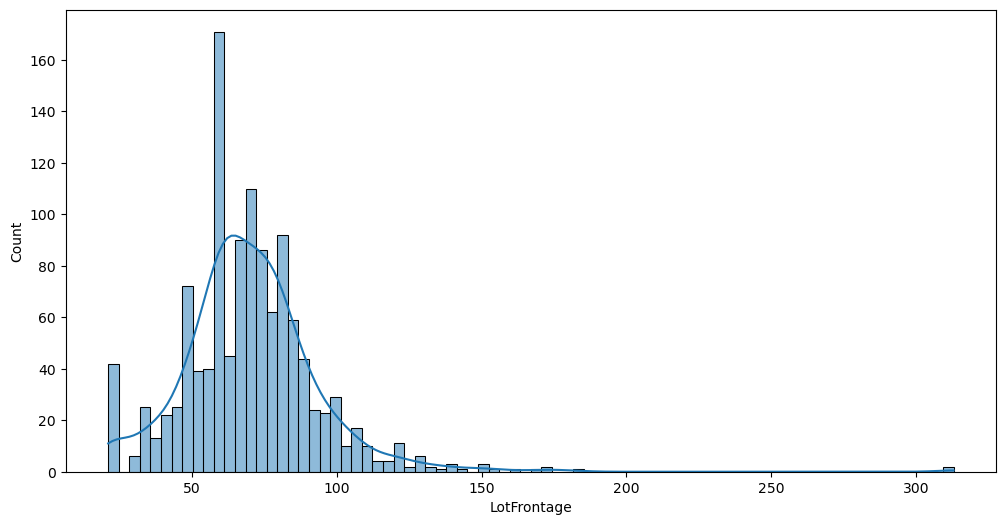

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="LotFrontage" , bins= 80 , kde = True)

### Most of the houses have Lotfrontage (Property ke aage jagah) of 60 sq. feet
### Very less no. of houses which have greater than 120 sq. feet Lotfrontage

<Axes: xlabel='LotArea', ylabel='Count'>

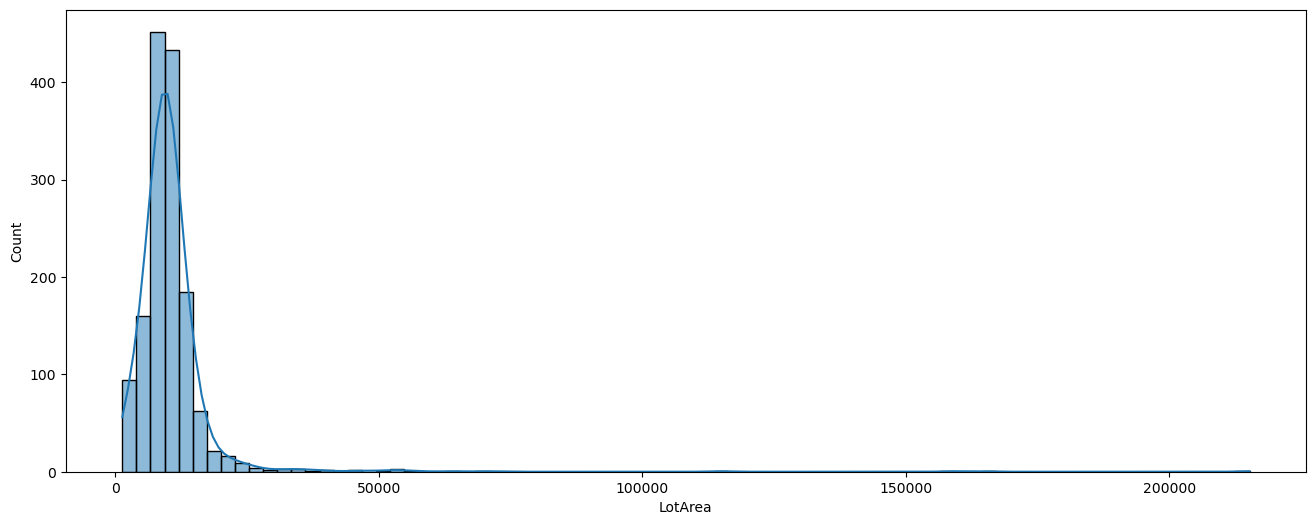

In [38]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x="LotArea" , bins = 80 , kde = True)

 The standard deviation of Lotarea is very high that implies the data is highly spreaded & from above we can see that some have very large area and many (>75%) has lot area of about 11000 sq. feet . Some outliers may also be present in this column

[Text(0, 0, '1454'), Text(0, 0, '6')]

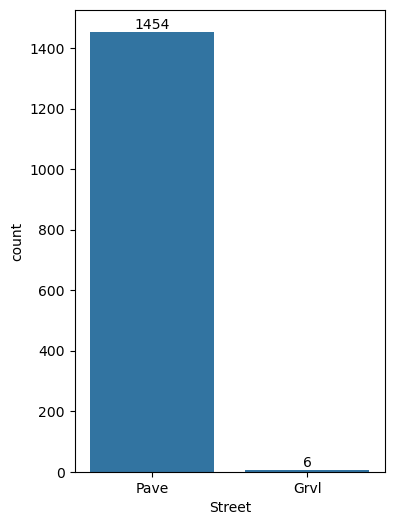

In [44]:
plt.figure(figsize=(4,6))
ax = sns.countplot(data=df, x="Street")
ax.bar_label(ax.containers[0])

### Most of thr houses have Pave Street (modern) and only 6 house have grvl street(less developed)

<Axes: xlabel='Alley', ylabel='count'>

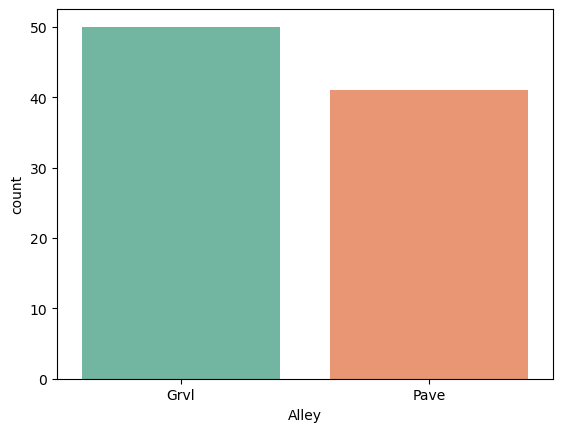

In [45]:
sns.countplot(data=df, x="Alley" , palette="Set2")

### There are only something 90 values total which tells there is lot of null values in this column 
### In this null values signifies there is no alley(small path) present around the houses.

<Axes: xlabel='LotShape', ylabel='count'>

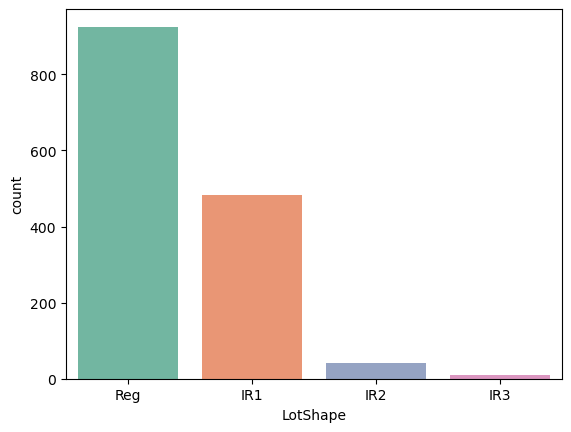

In [48]:
sns.countplot(data=df, x="LotShape" , palette="Set2")

### Most of the houses have regular shape and very few are highly irregular in shape

[Text(0, 0, '1459')]

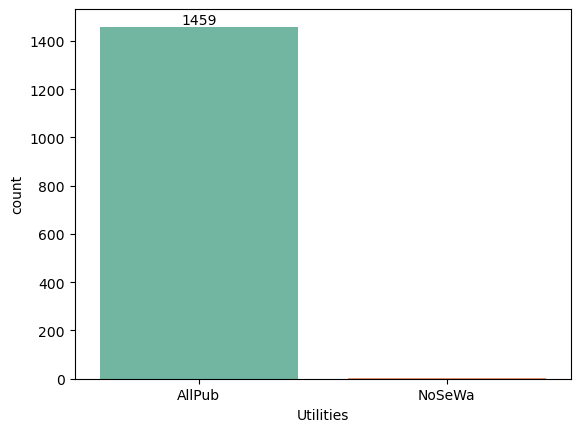

In [50]:
ax = sns.countplot(data=df, x="Utilities" , palette="Set2")
ax.bar_label(ax.containers[0])

### Excluding one All houses have All public facilities

<Axes: xlabel='OverallQual', ylabel='count'>

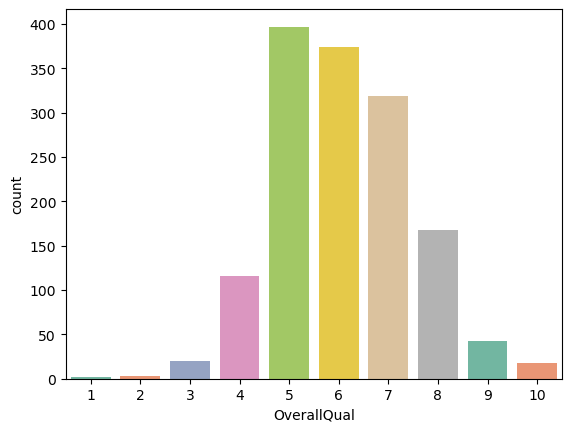

In [55]:
sns.countplot(data=df, x="OverallQual" , palette="Set2")

### Most of the houses have Quality rating of 5-7

<Axes: xlabel='OverallCond', ylabel='count'>

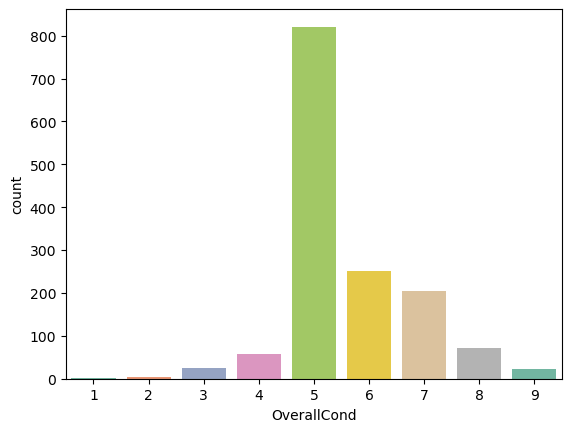

In [56]:
sns.countplot(data=df, x="OverallCond" , palette="Set2")   

### Most of the houses have overall condition rating of 5 which implies that quality is average.